In [1]:
#install.packages("Seurat")
library(Seurat)


Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [4]:
# Create a directory to store the data
dir.create("pbmc3k_data")

In [5]:
# Set the working directory
setwd("pbmc3k_data")

In [6]:
download.file("https://cf.10xgenomics.com/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz", destfile = "pbmc3k_filtered_gene_bc_matrices.tar.gz")


In [7]:
# Extract the downloaded file
untar("pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [8]:

# List the files to ensure the correct structure
list.files("filtered_gene_bc_matrices/hg19/")

[1] "barcodes.tsv" "genes.tsv"    "matrix.mtx"

In [9]:
# Load the pbmc3k dataset
pbmc.data <- Read10X(data.dir = "filtered_gene_bc_matrices/hg19/")

In [10]:
# Load PBMC dataset
pbmc.data <- Read10X(data.dir = "filtered_gene_bc_matrices/hg19/")

# Initialize the Seurat object with the raw (non-normalized data)
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


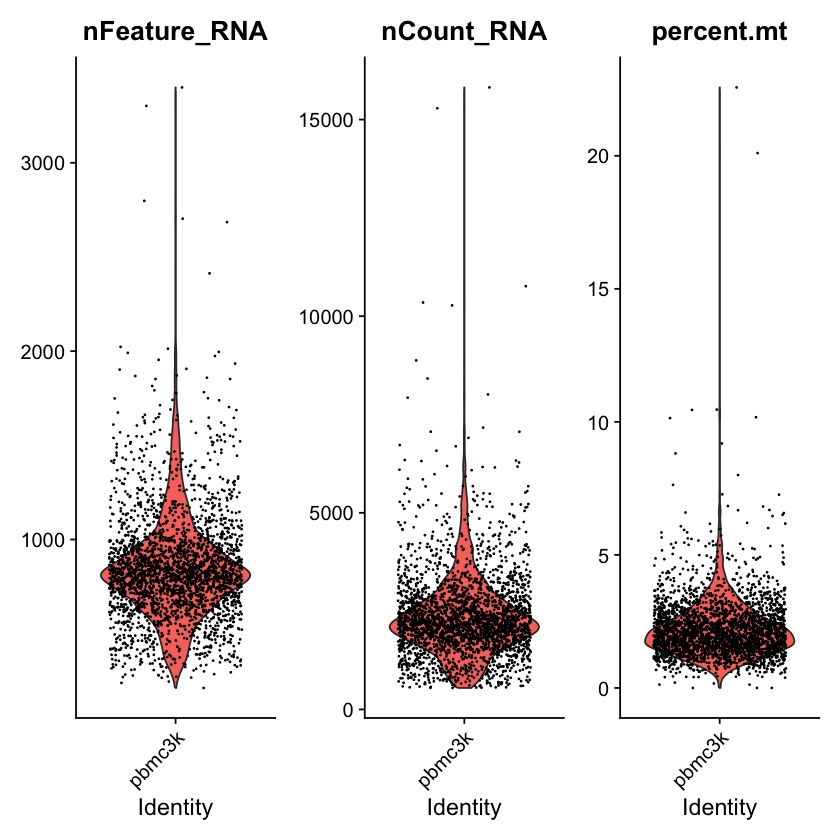

In [11]:
# Calculate the percentage of mitochondrial genes
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# Filter cells based on QC metrics
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)


In [12]:
# Normalize the data
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)


Normalizing layer: counts



Finding variable features for layer counts

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


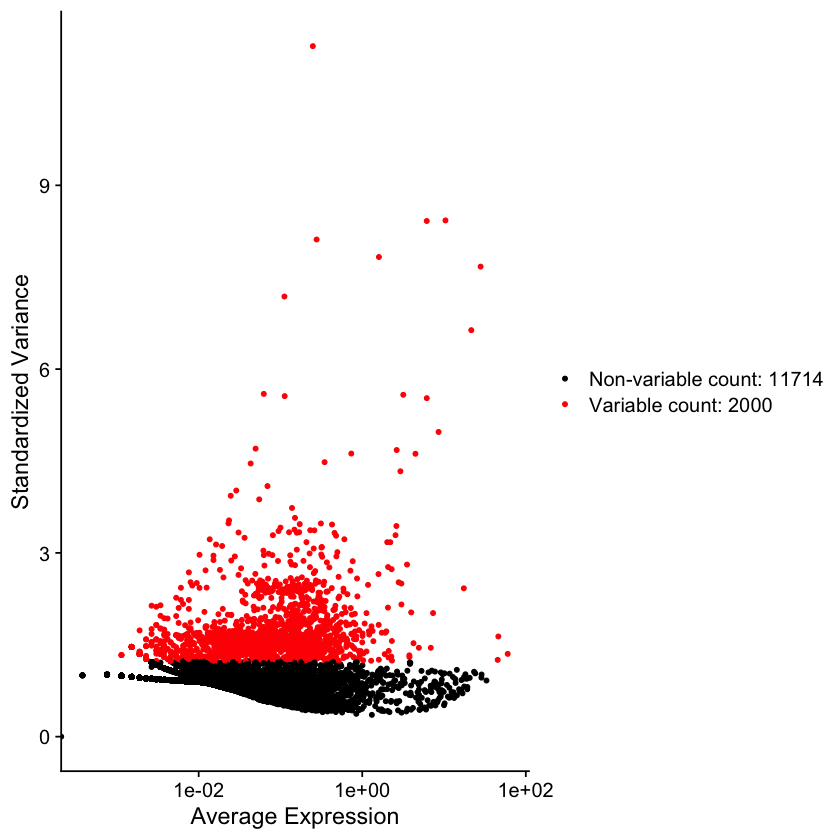

In [13]:
# Identify the 2,000 most variable genes
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Plot variable features
VariableFeaturePlot(pbmc)


In [14]:
# Scale the data
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)


Centering and scaling data matrix



PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


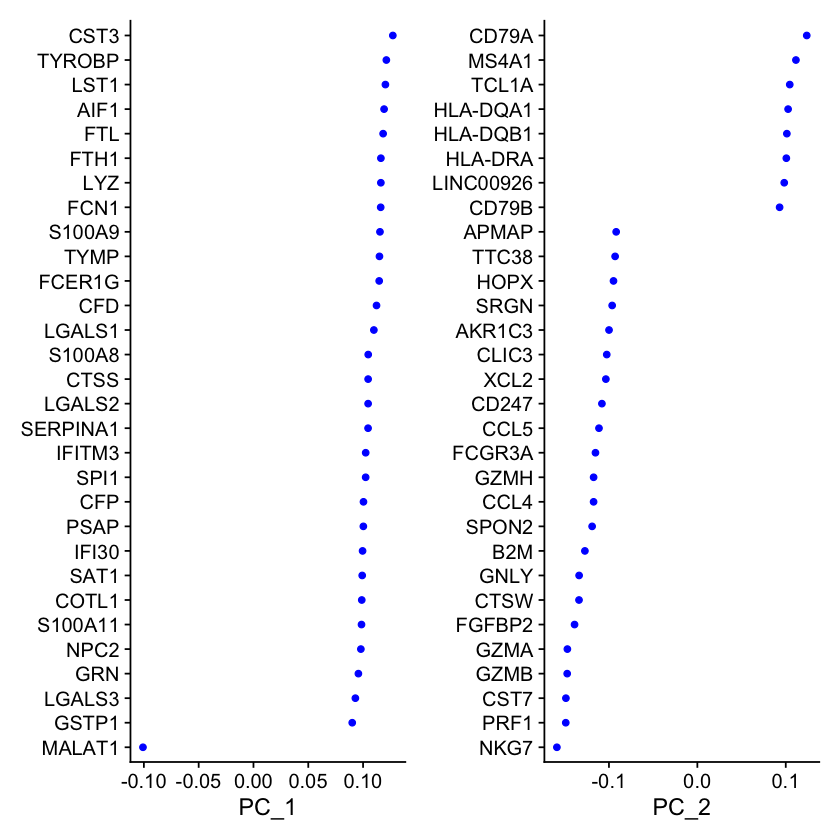

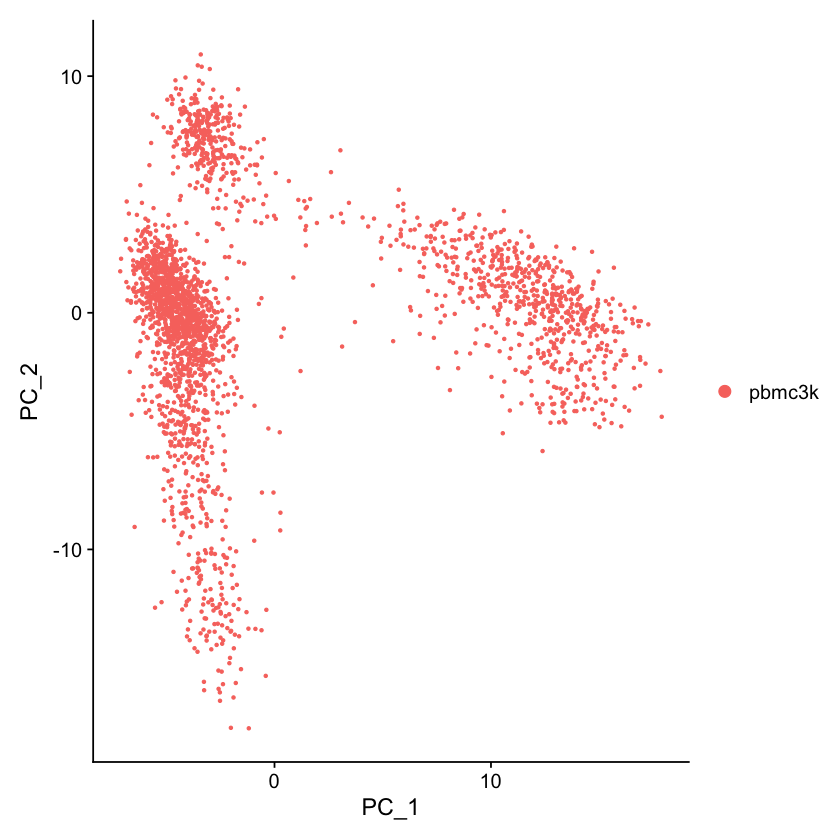

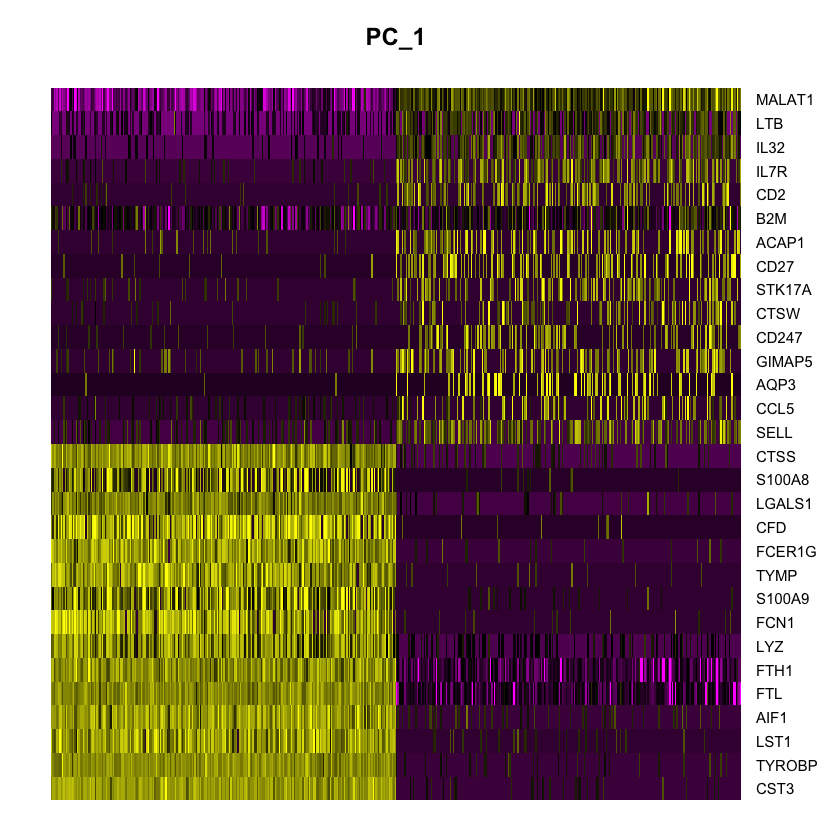

In [15]:
# Perform PCA
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

# Visualize PCA results
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")
DimPlot(pbmc, reduction = "pca")
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)


Warning message:
“Removed 23493 rows containing missing values or values outside the scale range
(`geom_point()`).”


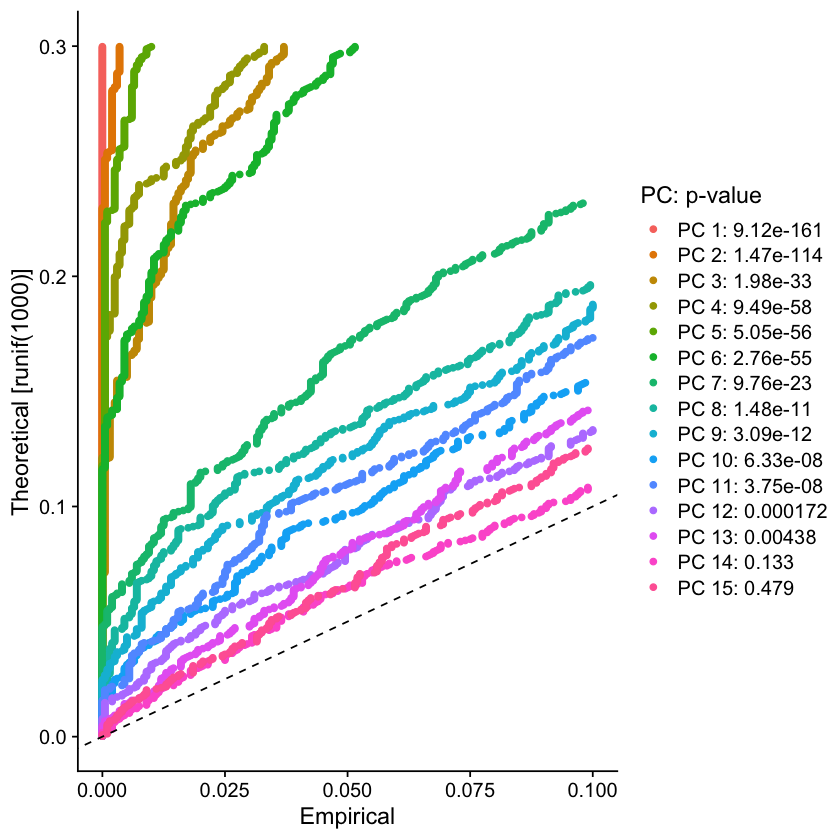

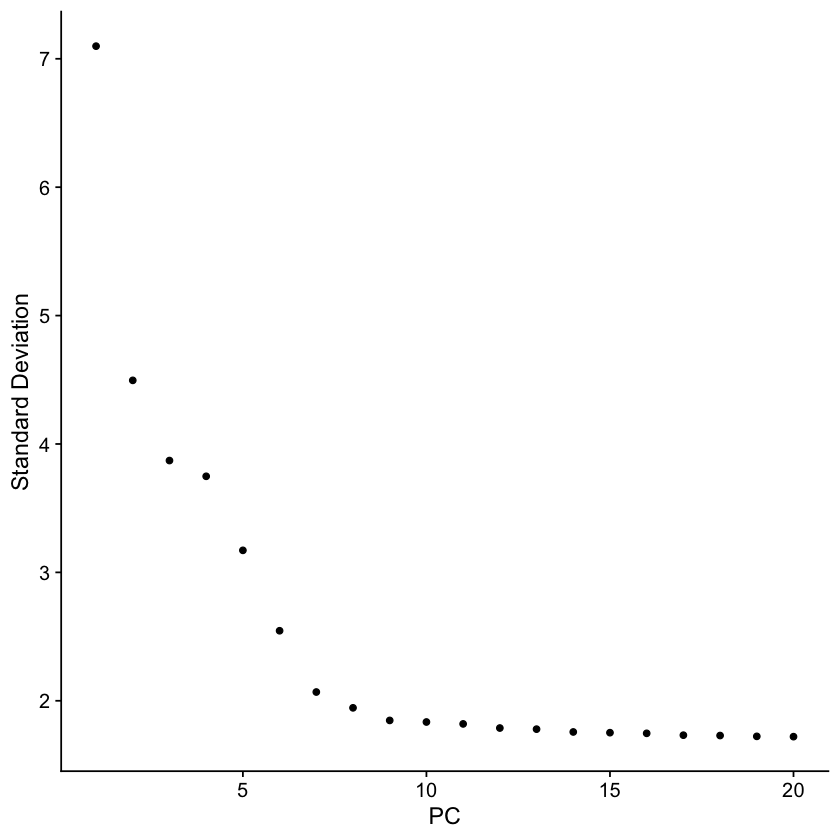

In [16]:
# Determine the ‘dimensionality’ of the dataset
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)
JackStrawPlot(pbmc, dims = 1:15)
ElbowPlot(pbmc)


In [17]:
# Cluster the cells
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

# Look at cluster IDs of the first 5 cells
head(Idents(pbmc), 5)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1 AAACCGTGCTTCCG-1 
               2                3                2                1 
AAACCGTGTATGCG-1 
               6 
Levels: 0 1 2 3 4 5 6 7 8

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:29:27 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

12:29:27 Read 2638 rows and found 10 numeric columns

12:29:27 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

12:29:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:29:28 Writing NN index file to t

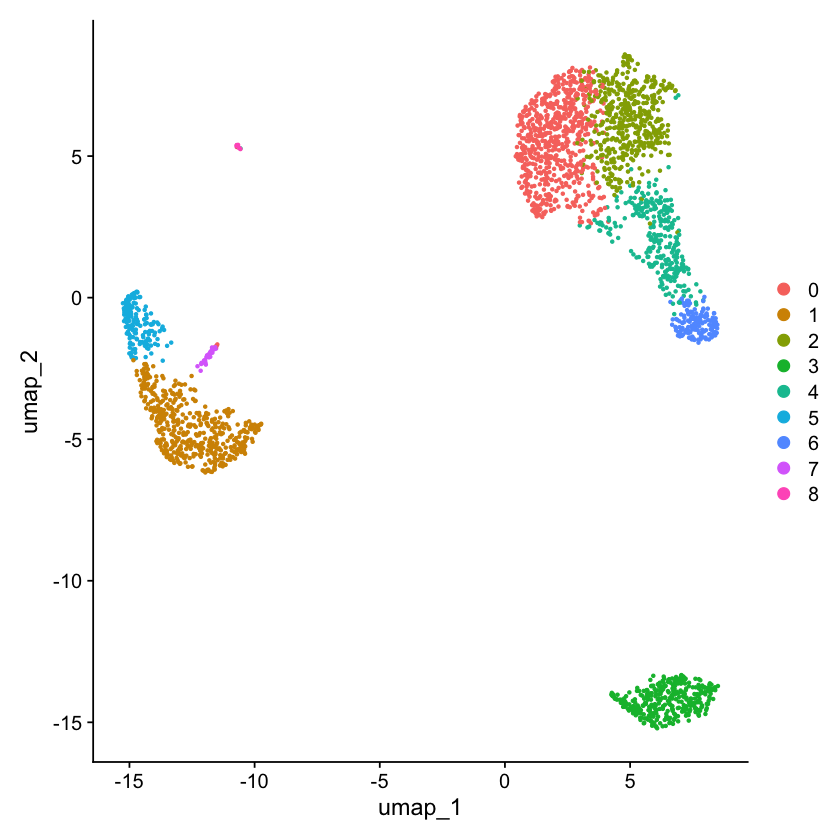

In [18]:
# Run UMAP
pbmc <- RunUMAP(pbmc, dims = 1:10)
DimPlot(pbmc, reduction = "umap")


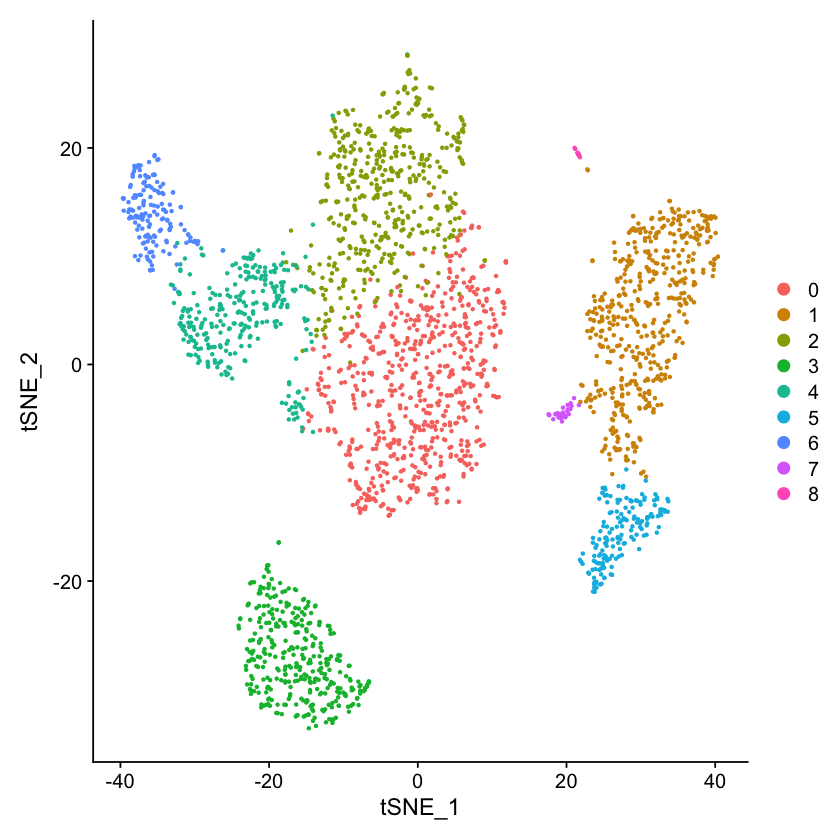

In [19]:
# Run t-SNE (optional)
pbmc <- RunTSNE(pbmc, dims = 1:10)
DimPlot(pbmc, reduction = "tsne")


For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



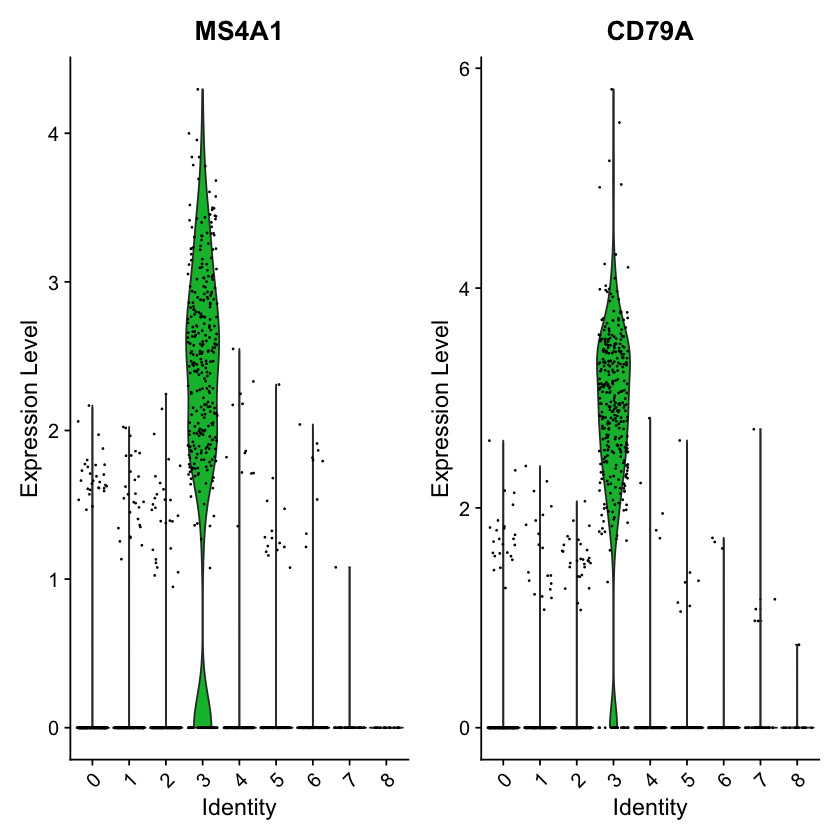

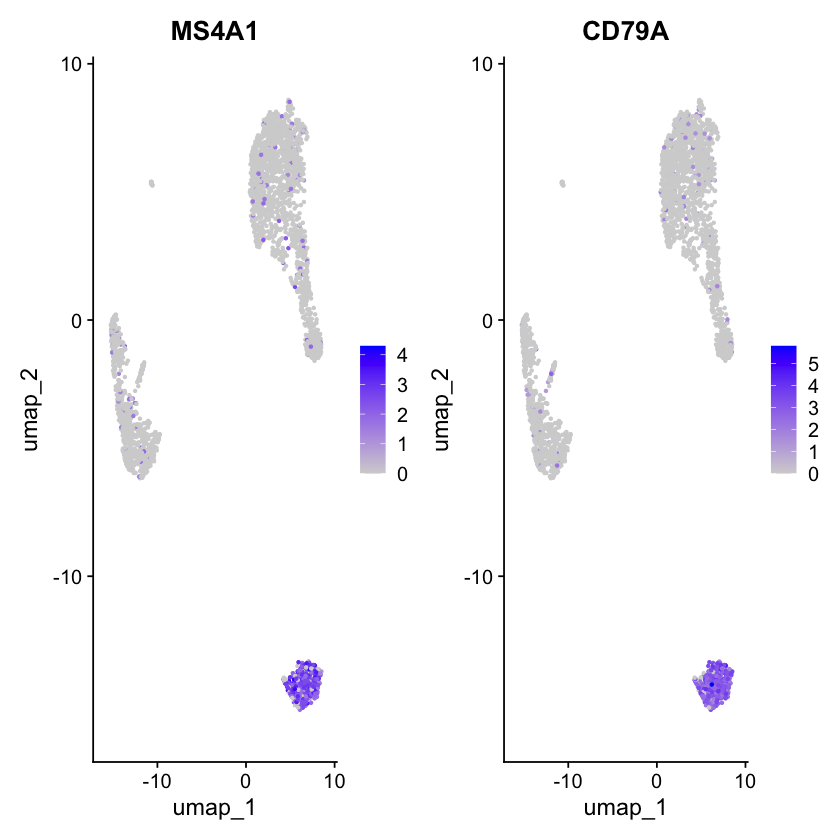

In [20]:
# Find all markers of cluster 1
cluster1.markers <- FindMarkers(pbmc, ident.1 = 1, min.pct = 0.25)

# Find markers for every cluster compared to all remaining cells, report only the positive ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

# Visualize some of the markers
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))
FeaturePlot(pbmc, features = c("MS4A1", "CD79A"))


In [21]:
# Save the Seurat object
saveRDS(pbmc, file = "pbmc3k_final.rds")

# Load the Seurat object
pbmc <- readRDS(file = "pbmc3k_final.rds")
